name: Jingyue zhang
studentID: 7529916984
githubname: Jingyuezzz

In [69]:
import pandas as pd
import numpy as np
import seaborn
import statsmodels.api as sma
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

1.(a)import data

In [5]:
data = pd.read_excel("../data/Folds5x2_pp.xlsx");

1.(b)i

In [6]:
data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


This dataset contains 9569 rows and 5 columns.Column AT, V, AP and RH represent hourly average ambient variables, and column PE is net hourly electrical energy output. Each row represent a data point when the power plant was set to work with full load between 2006 and 2011.

1.(b)ii

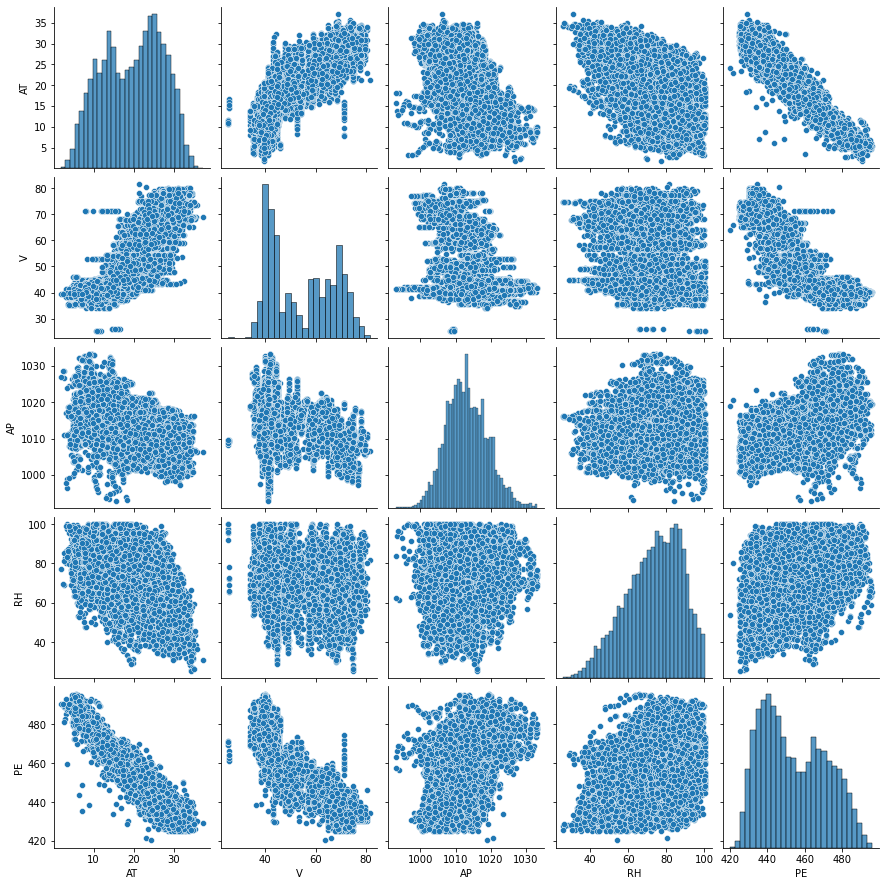

In [7]:
seaborn.pairplot(data,vars = data.columns)

Findings:AT and PE have a negative correlation .V and PE have a negative correlation.
         From the plot, independent variables AP and RH shows no obvious linear pattern with PE.
         There is a positive correlation between two independent varibles AT and V.

    

1.(b)iii.

In [8]:
data_summary = {}
a = data.describe().T
data_summary = {'mean':a['mean'],'median':a['50%'],'range':a['max']-a['min'],'first quartiles':a['25%'],'third quartiles':a['75%'],
             'interquartile range':a['75%']-a['25%']}
df_summary = pd.DataFrame(data_summary)
df_summary

,mean,median,range,first quartiles,third quartiles,interquartile range
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


1.(c)

In [9]:
def linearRegression(feature):
    X = data[feature]
    Y = data['PE']
    X1 = sma.add_constant(X)
    model = sma.OLS(Y,X1)
    res = model.fit()
    print('predictor:'+ feature)
    print(res.summary())
    plt.figure(figsize=(7,5))
    seaborn.regplot(x=X,y=Y,line_kws={"color": "red"})
    plt.ylim(min(Y)-10, max(Y)+10)
    plt.xlim(min(X)-10, max(X)+10)
    plt.show()
    plt.figure(figsize=(7,5))
    plt.boxplot(X)
    plt.show()
    return res.params[1]
    


predictor:AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Sun, 25 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:21:40   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177

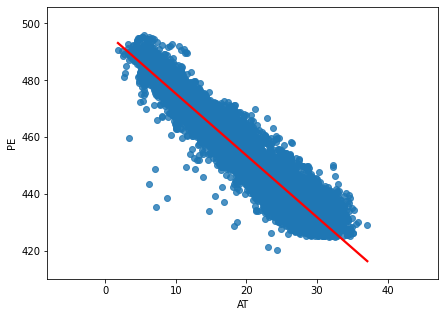

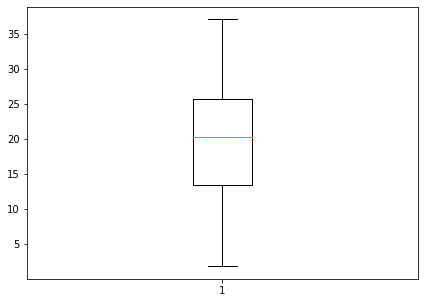

predictor:V
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Sun, 25 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:21:42   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.

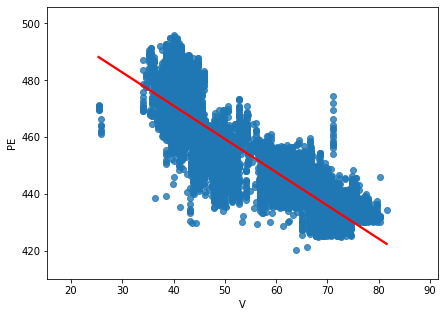

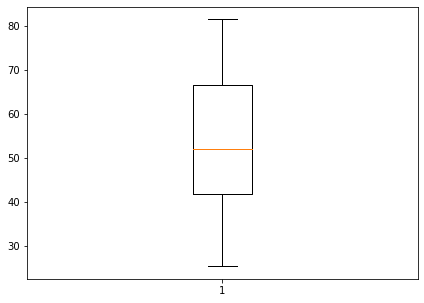

predictor:AP
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Sun, 25 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:21:43   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41

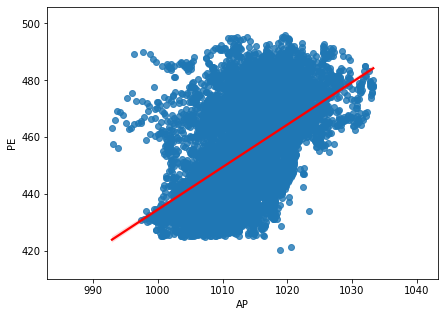

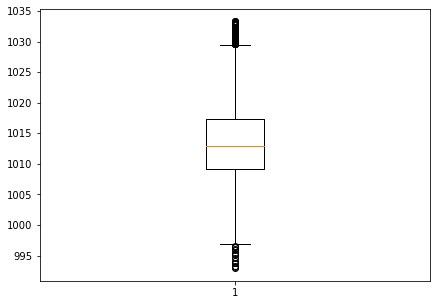

predictor:RH
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Sun, 25 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:21:45   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511

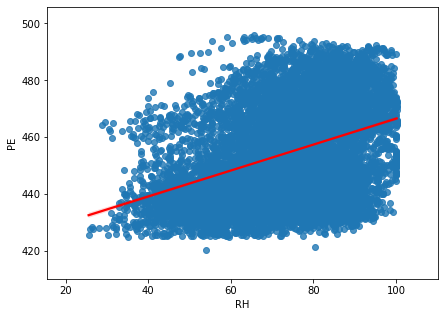

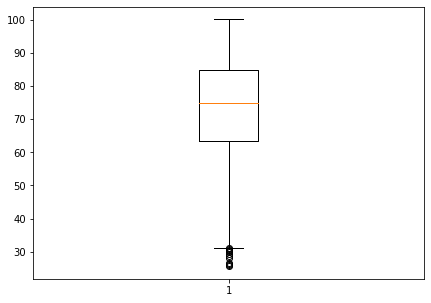

In [10]:
features = list(data.columns[0:4])
coef1 = []
for f in features:
    coef = linearRegression(f)
    coef1.append(coef)

From the result table above,we can conclude that all four predictors have a statistically significant association with response since the p-value is less than 0.05. There are outliers for predictor RH and AP according to the boxplots.

1.(d)

In [11]:
Y = data['PE']
X = data[['AT','V','AP','RH']]
X1 = sma.add_constant(X)
model = sma.OLS(Y,X1)
res = model.fit()
coef2 = res.params[1:]
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sun, 25 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:21:46   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

For all four predictors, the p-value of the predictors are smaller than 0.05,we can we reject the null hypothesis H0 : βj = 0.


1.(e)

<function matplotlib.pyplot.show(close=None, block=None)>

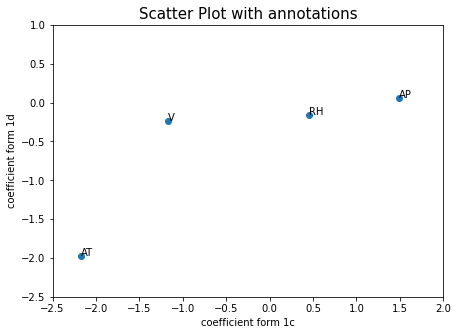

In [12]:
plt.figure(figsize=(7,5))
plt.scatter(coef1,coef2)
plt.ylim(-2.5,1)
plt.xlim(-2.5, 2)
annotations=['AT','V','AP','RH']
plt.xlabel("coefficient form 1c")
plt.ylabel("coefficient form 1d")
plt.title("Scatter Plot with annotations",fontsize=15)
for i, label in enumerate(annotations):
    plt.annotate(label, (coef1[i], coef2[i]))
plt.show

1.(f)

In [13]:
def polyRegression(feature):
    X = data[feature].values.reshape(-1,1)
    Y = data['PE']
    poly = PolynomialFeatures(3)
    X_T = poly.fit_transform(X)
    sma.add_constant(X_T)
    model = sma.OLS(Y,X_T)
    res = model.fit()
    print('predictor:'+ feature)
    print(res.summary())

    

In [14]:
for f in features:
    polyRegression(f)

predictor:AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Sun, 25 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:21:47   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732

The p-value is smaller than 0.05 of all polynomial features except feature V. This indicates there is a nonlinear association between the predictors and the
response

1.(g)

In [27]:
X = data[['AT','V','AP','RH']]  
#X_reshape = X.values.reshape(-1,1)
Y = data['PE']
poly = PolynomialFeatures(degree = 2,interaction_only=True)
X_T = poly.fit_transform(X)
sma.add_constant(X_T)
model = sma.OLS(Y,X_T)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Sun, 25 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:36:38   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

From the table above, we can see p-value of some interaction terms is smaller than 0.05,so there are statistically significant interaction terms.

1.(h)

In [97]:
#model with all predictors
from sklearn.metrics import mean_squared_error
X = data[['AT','V','AP','RH']]  
Y = data['PE']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)
X_train1 = sma.add_constant(X_train)
model = sma.OLS(Y_train,X_train1)
res = model.fit()
Y_train_predict = res.predict(X_train1)
train_MSE = mean_squared_error(Y_train,Y_train_predict)
X_test1 = sma.add_constant(X_test)
Y_test_predict = res.predict(X_test1)
test_MSE = mean_squared_error(Y_test,Y_test_predict)
print("train MSE:",train_MSE)
print("test MSE:",test_MSE)


train MSE: 20.677626207814903
test MSE: 20.99004529596328


In [86]:
#model with all possible interaction terms and quadratic
formula = 'PE ~ AT + V + AP + RH + np.power(AT,2)+np.power(V,2)+np.power(AP,2)+np.power(RH,2)+ AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH'
model = smf.ols(formula = formula, data = pd.concat([X_train, Y_train],axis = 1))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     7371.
Date:                Sun, 25 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:59:54   Log-Likelihood:                -19174.
No. Observations:                6697   AIC:                         3.838e+04
Df Residuals:                    6682   BIC:                         3.848e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7333.5029   1430.976     -5.125      0.000   -1.01e+04   -4528.333
AT                 -6.4813      3.703     -1.750      0.080     -13.740       0.777
V                  -1.9612      1.795     -1.093      0.275      -5.479       1.557
AP                 15.2192      2.775      5.484      0.000       9.779      20.659
RH                  4.2308      1.050      4.028      0.000       2.172       6.290
np.power(AT, 2)     0.0206      0.004      5.592      0.000       0.013       0.028
np.power(V, 2)      0.0003      0.001      0.319      0.749      -0.002       0.002
np.power(AP, 2)    -0.0074      0.001     -5.479      0.000      -0.010      -0.005
np.power(RH, 2)    -0.0019      0.000     -6.117      0.000      -0.003      -0.001
AT:V                0.0066      0.003      2.025      0.043       0.000       0.013
AT:AP               0.0038      0.004      1.070      0.285      -0.003       0.011
AT:RH              -0.0051      0.002     -2.843      0.004      -0.009      -0.002
V:AP                0.0015      0.002      0.857      0.392      -0.002       0.005
V:RH               -0.0004      0.001     -0.452      0.651      -0.002       0.001
AP:RH              -0.0039      0.001     -3.839      0.000      -0.006      -0.002
==============================================================================
Omnibus:                     1058.349   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7330.012
Skew:                          -0.572   Prob(JB):                         0.00
Kurtosis:                       7.996   Cond. No.                     2.85e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the result table above, V^2, AT:AP,V:AP,V:RH with a p value greater than 0.05,and need to be removed.

In [90]:
#new model
formula = 'PE ~ AT + V + AP + RH + np.power(AT,2)+np.power(AP,2)+np.power(RH,2)+ AT*V + AT*RH + AP*RH'
model = smf.ols(formula = formula, data = pd.concat([X_train, Y_train],axis = 1))
res = model.fit()
X_train1 = sma.add_constant(X_train)
Y_train_predict = res.predict(X_train1)
train_MSE = mean_squared_error(Y_train,Y_train_predict)
X_test1 = sma.add_constant(X_test)
Y_test_predict = res.predict(X_test1)
test_MSE = mean_squared_error(Y_test,Y_test_predict)
print("train MSE:",train_MSE)
print("test MSE:",test_MSE)

train MSE: 17.98887008532152
test MSE: 18.5192124432418


1.(i)

In [116]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
#with raw data
train_err = []
test_err = []
k_range = range(1,101,1)
k_reverse = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,Y_train)
    predicted_train_y = knn.predict(X_train)
    predicted_test_y = knn.predict(X_test)
    train_MSE = mean_squared_error(Y_train,predicted_train_y)
    test_MSE = mean_squared_error(Y_test,predicted_test_y)
    train_err.append(train_MSE)
    test_err.append(test_MSE)
    k_reverse.append(1/k)
min_err = min(test_err)
k_optimal = k_range[test_err.index(min_err)]
print('optimal k:',k_optimal)
print('smallest test error:',min_err)

optimal k: 5
smallest test error: 15.839981329153595


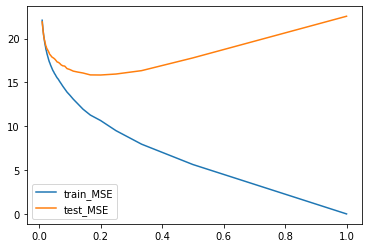

In [117]:
#plot
plt.plot(k_reverse,train_err,label='train_MSE')
plt.plot(k_reverse,test_err,label='test_MSE')
plt.legend()
plt.show()

In [118]:
#with normalized data
from sklearn import preprocessing
X_train_n = preprocessing.normalize(X_train)
X_test_n = preprocessing.normalize(X_test)
train_err = []
test_err = []
k_range = range(1,101,1)
k_reverse = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_n,Y_train)
    predicted_train_y = knn.predict(X_train_n)
    predicted_test_y = knn.predict(X_test_n)
    train_MSE = mean_squared_error(Y_train,predicted_train_y)
    test_MSE = mean_squared_error(Y_test,predicted_test_y)
    train_err.append(train_MSE)
    test_err.append(test_MSE)
    k_reverse.append(1/k)
min_err = min(test_err)
k_optimal = k_range[test_err.index(min_err)]
print('optimal k:',k_optimal)
print('smallest test error:',min_err)

optimal k: 9
smallest test error: 17.801427154473647


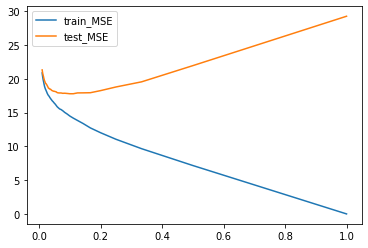

In [119]:
plt.plot(k_reverse,train_err,label='train_MSE')
plt.plot(k_reverse,test_err,label='test_MSE')
plt.legend()
plt.show()

1.(j)The smallest test error for the linear regression model is 18.5 and for KNN model is 15.8.KNN model works better in this case.

 
2.(a) The performance will be better. A more flexible approach will fit the large data better where inflexible approach maybe underfitted.
(b) The performance will be worse. A flexible approach may overfit the small dataset.
(c) The performance will be better. A flexible model would fit better.
(d) The performance will be worse. Flexible methods will increase the variance.

3.

In [123]:
import math
obs1 = math.sqrt(3)
obs2 = math.sqrt(4)
obs3 = math.sqrt(1+9)
obs4 = math.sqrt(1+4)
obs5 = math.sqrt(1+1)
obs6 = math.sqrt(1+1+1)
print('observation1:',obs1)
print('observation2:',obs2)
print('observation3:',obs3)
print('observation4:',obs4)
print('observation5:',obs5)
print('observation6:',obs6)


observation1: 1.7320508075688772
observation2: 2.0
observation3: 3.1622776601683795
observation4: 2.23606797749979
observation5: 1.4142135623730951
observation6: 1.7320508075688772


(b) The prediction is green since the nearest data point is obs 5 when k=1. 

(c)The prediction is red since when k=3,the nearest data point is obs 2,5,6 and two obs with Y = red.

(d)It is better with a small k. A small k would be flexible for a non-linear decision boundary.